In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(rc={'figure.figsize':(6,8)}) 

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

from sklearn.preprocessing import LabelEncoder 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import SCORERS
import re

import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Cyber Security Tweets | Sofia

In [2]:
data = pd.read_csv('cybersecurity_tweets.csv')

In [3]:
data = data.drop_duplicates('text')
data.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,x109082290,x1404488925935177737,2021-06-14 17:20:28,NcsVentures,"Signs, Causes and Solutions for Network Data B...",WordPress.com,109,NaN,NaN,NaN,...,260725,0,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/10908229...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/...
1,x109082290,x1403635112613494786,2021-06-12 08:47:43,NcsVentures,Battling Chinese Big Tech encroachment in Indi...,WordPress.com,103,NaN,NaN,NaN,...,260725,0,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/10908229...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/...
2,x109082290,x1403747937818120198,2021-06-12 16:16:03,NcsVentures,Ask Dr. Jeanette® Success On “The Way” Devil O...,WordPress.com,226,NaN,NaN,NaN,...,260725,0,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/10908229...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/...
3,x109082290,x1404021845913899009,2021-06-13 10:24:28,NcsVentures,Cyber threats to Digital Pakistan | #cybersecu...,WordPress.com,89,NaN,NaN,NaN,...,260725,0,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/10908229...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/...
4,x109082290,x1404053089804554241,2021-06-13 12:28:37,NcsVentures,Pakistan Cyber Attack News: Pakistan army clai...,WordPress.com,152,NaN,NaN,NaN,...,260725,0,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/10908229...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/...


In [4]:
data.shape

(17656, 90)

In [5]:
data.dtypes

user_id                    object
status_id                  object
created_at                 object
screen_name                object
text                       object
                           ...   
profile_expanded_url       object
account_lang              float64
profile_banner_url         object
profile_background_url     object
profile_image_url          object
Length: 90, dtype: object

In [6]:
df = data[["text", "is_quote", "is_retweet", "retweet_count", "hashtags", "followers_count"]]

In [7]:
text = df[["text"]][:10000] # using subset for now so it will run faster
pd.set_option('display.max_colwidth', -1)
text.head()

,text
0,"Signs, Causes and Solutions for Network Data Breaches | #cybersecurity | #cyberattack https://t.co/oxotVQ4ogO"
1,Battling Chinese Big Tech encroachment in India | #cybersecurity | #cyberattack https://t.co/GFXaut9ZXH
2,Ask Dr. Jeanette® Success On “The Way” Devil On A Choke Chain! It’s Gonna Be Quick! It’s Gonna Be Sure! It’s Gonna Be Final! – Los Angeles Sentinel | Los Angeles Sentinel | #cybersecurity | #cyberattack https://t.co/0yfsRAdUMk
3,Cyber threats to Digital Pakistan | #cybersecurity | #cyberattack https://t.co/Se4ENqeOQT
4,Pakistan Cyber Attack News: Pakistan army claims major cyber attack by Indian intel | World News | #cybersecurity | #cyberattack https://t.co/wsnAO20OiG


In [8]:
ident = data[["verified", "lang", "location", "followers_count", "description", "user_id"]] # can always change later
ident = ident.drop_duplicates()
ident.head()

,verified,lang,location,followers_count,description,user_id
0,False,en,"Atlanta, GA",8524,"We are a leader in #news for #cybersecurity #hacker , #hacking, #techjobs, #NationalCyberSecurity Download our #app ""National Cyber Security 5.0""",x109082290
459,False,en,United States,7288,Gregory D. Evans is a #CyberSecurity #Mogul & Founder of #NationalCyberSecurity | 1st Hacker to make $100M | Ex-Hacker | | #SecurityNews | #HackerNews,x194297917
918,False,en,NaN,0,NaN,x1404297347950071818
919,False,en,NaN,82,NaN,x4439325029
921,False,en,United States,52913,"#IIoT_World™ is the first Global #DigitalPublication focused 100% on #IIoT, #Industry40, #SmartManufacturing #ICS #security. #1 Industrial IoT #Influencer.",x821567125785612288


## Cleaning Data

### Text Data

In [9]:
wnet = WordNetLemmatizer()
port = PorterStemmer()

In [10]:
def cleanTxt(txt):
    txt = txt.lower()
    txt = re.sub(r'RT[\s]+', '', txt) #removing RT
    txt = re.sub(r'[^\w\s]','', txt) #remove everything except words and space
    txt = re.sub(r'_','', txt) #how to remove underscore as well
    if 'https' in txt: # removing hyperlinks 
        pos = txt.find('https')
        txt = txt[:pos]
    return txt

In [11]:
text['text'] = text['text'].apply(cleanTxt)
text.head()

,text
0,signs causes and solutions for network data breaches cybersecurity cyberattack
1,battling chinese big tech encroachment in india cybersecurity cyberattack
2,ask dr jeanette success on the way devil on a choke chain its gonna be quick its gonna be sure its gonna be final los angeles sentinel los angeles sentinel cybersecurity cyberattack
3,cyber threats to digital pakistan cybersecurity cyberattack
4,pakistan cyber attack news pakistan army claims major cyber attack by indian intel world news cybersecurity cyberattack


In [12]:
def stopWords(txt): 
    txt_lst = txt.split(" ")
    txt_lst = [word for word in txt_lst if word not in stopwords.words('english')]
    txt_lst = [wnet.lemmatize(word) for word in txt_lst]
    txt_lst = [word for word in txt_lst if word != '']
    txt_lst = [word for word in txt_lst if word != '\r\n\r\n'] # indicates space and indexing
    txt_lst = [word for word in txt_lst if word != 'u0001f449'] # indicates back hand emoji pointing right
    txt_lst = [word for word in txt_lst if word != 'cybersecurity']
    txt_lst = [word for word in txt_lst if word != 'cyber']
    txt_lst = [word for word in txt_lst if word != 'security']
    return " ".join(txt_lst)

In [14]:
%time
text['text'] = text['text'].apply(stopWords)
text.head()

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs


,text
0,sign cause solution network data breach cyberattack
1,battling chinese big tech encroachment india cyberattack
2,ask dr jeanette success way devil choke chain gonna quick gonna sure gonna final los angeles sentinel los angeles sentinel cyberattack
3,threat digital pakistan cyberattack
4,pakistan attack news pakistan army claim major attack indian intel world news cyberattack


### Identifying Data

In [15]:
ident.isna().sum()

verified           0   
lang               0   
location           1574
followers_count    0   
description        548 
user_id            0   
dtype: int64

In [16]:
ident = ident.dropna()
ident.isna().sum()

verified           0
lang               0
location           0
followers_count    0
description        0
user_id            0
dtype: int64

In [17]:
ident['description'] = ident['description'].apply(cleanTxt)
ident.head()

,verified,lang,location,followers_count,description,user_id
0,False,en,"Atlanta, GA",8524,we are a leader in news for cybersecurity hacker hacking techjobs nationalcybersecurity download our app national cyber security 50,x109082290
459,False,en,United States,7288,gregory d evans is a cybersecurity mogul founder of nationalcybersecurity 1st hacker to make 100m exhacker securitynews hackernews,x194297917
921,False,en,United States,52913,iiotworld is the first global digitalpublication focused 100 on iiot industry40 smartmanufacturing ics security 1 industrial iot influencer,x821567125785612288
927,False,en,"Kennedy Space Center, FL",212,the ncuisao advances credit union cyber resilience connecting public and privatesector stakeholders to share information,x953682855372009472
933,False,en,"Andover, MA",9196,capsule technologies is a leading global provider of medical data technologies for hospitals healthcare organizations,x211329040


In [18]:
ident['description'] = ident['description'].apply(stopWords)
ident.head()

,verified,lang,location,followers_count,description,user_id
0,False,en,"Atlanta, GA",8524,leader news hacker hacking techjobs nationalcybersecurity download app national 50,x109082290
459,False,en,United States,7288,gregory evans mogul founder nationalcybersecurity 1st hacker make 100m exhacker securitynews hackernews,x194297917
921,False,en,United States,52913,iiotworld first global digitalpublication focused 100 iiot industry40 smartmanufacturing ic 1 industrial iot influencer,x821567125785612288
927,False,en,"Kennedy Space Center, FL",212,ncuisao advance credit union resilience connecting public privatesector stakeholder share information,x953682855372009472
933,False,en,"Andover, MA",9196,capsule technology leading global provider medical data technology hospital healthcare organization,x211329040


In [19]:
desc = ident[['description']]
desc.head()

,description
0,leader news hacker hacking techjobs nationalcybersecurity download app national 50
459,gregory evans mogul founder nationalcybersecurity 1st hacker make 100m exhacker securitynews hackernews
921,iiotworld first global digitalpublication focused 100 iiot industry40 smartmanufacturing ic 1 industrial iot influencer
927,ncuisao advance credit union resilience connecting public privatesector stakeholder share information
933,capsule technology leading global provider medical data technology hospital healthcare organization


### Vectorizing Data

#### Text Data

Vectorizing using Binary Term Frequency ([link](https://towardsdatascience.com/getting-started-with-text-vectorization-2f2efbec6685)). Binary Term Frequency captures presence (1) or absence (0) of term in document. For this part, under TfidfVectorizer, we set binary parameter equal to true so that it can show just presence (1) or absence (0) and norm parameter equal to false.



In [20]:
text_lst = []
for row in text['text']:
    text_lst.append(row)

text_lst[:5] # need to make into a list so the vectorizer will work

['sign cause solution network data breach \xa0cyberattack',
 'battling chinese big tech encroachment india \xa0cyberattack',
 'ask dr jeanette success way devil choke chain gonna quick gonna sure gonna final los angeles sentinel los angeles sentinel \xa0cyberattack',
 'threat digital pakistan \xa0cyberattack',
 'pakistan attack news pakistan army claim major attack indian intel world news \xa0cyberattack']

In [21]:
tv = TfidfVectorizer(
binary = True, norm = None,
use_idf = False, smooth_idf = False,
lowercase = True, stop_words = None,
min_df = 1, max_df = 1.0, max_features = None, ngram_range = (1,1))

In [22]:
text_vec = pd.DataFrame(tv.fit_transform(text_lst).toarray(), columns = tv.get_feature_names())
text_vec.head()

,000,002002,0027,004002,006,00b328bc1cf5221fc6efb560c6bb764922c31e002179799da67f1f68a503ca41,013052,013105,013124,013125,...,zscaler,zta,ztna,zuckerbergstyle,zum,zumbullaw,zurich,zwatest,zyxel,zyz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
text_vec.shape

(10000, 15743)

#### Description Data

In [24]:
desc_lst = []
for row in desc['description']:
    desc_lst.append(row)

desc_lst[:5] # need to make into a list so the vectorizer will work

['leader news hacker hacking techjobs nationalcybersecurity download app national 50',
 'gregory evans mogul founder nationalcybersecurity 1st hacker make 100m exhacker securitynews hackernews',
 'iiotworld first global digitalpublication focused 100 iiot industry40 smartmanufacturing ic 1 industrial iot influencer',
 'ncuisao advance credit union resilience connecting public privatesector stakeholder share information',
 'capsule technology leading global provider medical data technology hospital healthcare organization']

In [25]:
desc_vec = pd.DataFrame(tv.fit_transform(desc_lst).toarray(), columns = tv.get_feature_names())
desc_vec.head()

,001,0099,01,01100101,01100111,01101000,01101111,01110010,01110100,0121,...,zyxel,àrea,área,économique,énfasis,ïgh,ïñ,ñuñoando,österreich,þlåïñ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Making List of Words

#### Text Data

In [26]:
cs_words = []

for row in text['text']:
    for word in str(row).split(" "):
        cs_words.append(word)
        
cs_words[:5]

['sign', 'cause', 'solution', 'network', 'data']

In [27]:
len(cs_words)

126356

In [28]:
from nltk.probability import FreqDist
fdist = FreqDist()
for word in cs_words:
    fdist[word]+=1
fdist

FreqDist({'infosec': 976, 'data': 849, 'ransomware': 820, 'attack': 781, '\xa0cyberattack': 690, 'new': 644, 'amp': 591, 'cybersecuritytips': 584, 'ethicalhacking': 580, 'cybersecuritynews': 577, ...})

In [29]:
freq_data = pd.DataFrame.from_dict(fdist.most_common(20))

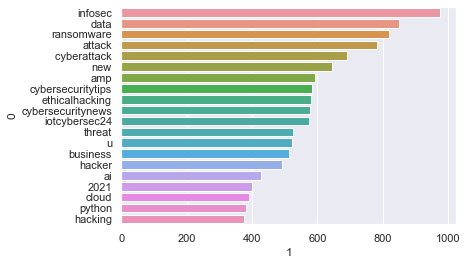

In [30]:
sns.barplot(data = freq_data, x = 1, y = 0);

In [31]:
most_common = []

for key in fdist.most_common(20):
    most_common.append(key[0])
    
most_common

['infosec',
 'data',
 'ransomware',
 'attack',
 '\xa0cyberattack',
 'new',
 'amp',
 'cybersecuritytips',
 'ethicalhacking',
 'cybersecuritynews',
 'iotcybersec24',
 'threat',
 'u',
 'business',
 'hacker',
 'ai',
 '2021',
 'cloud',
 'python',
 'hacking']

#### Description Data

In [32]:
desc_words = []

for row in desc['description']:
    for word in str(row).split(" "):
        desc_words.append(word)
        
desc_words[:5]

['leader', 'news', 'hacker', 'hacking', 'techjobs']

In [33]:
len(desc_words)

65033

In [34]:
from nltk.probability import FreqDist
fdist_desc = FreqDist()
for word in desc_words:
    fdist_desc[word]+=1
fdist_desc

FreqDist({'business': 651, 'technology': 531, 'service': 505, 'solution': 496, 'news': 355, 'digital': 322, 'tech': 315, 'data': 312, 'cloud': 265, 'company': 247, ...})

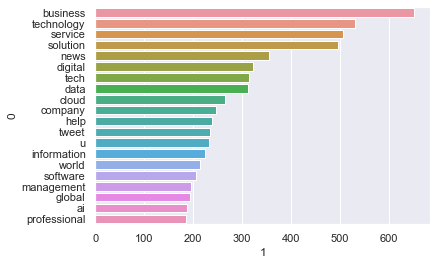

In [35]:
freq_data_desc = pd.DataFrame.from_dict(fdist_desc.most_common(20))
sns.barplot(data = freq_data_desc, x = 1, y = 0);

In [36]:
most_common_desc = []

for key in fdist_desc.most_common(20):
    most_common_desc.append(key[0])
    
most_common_desc

['business',
 'technology',
 'service',
 'solution',
 'news',
 'digital',
 'tech',
 'data',
 'cloud',
 'company',
 'help',
 'tweet',
 'u',
 'information',
 'world',
 'software',
 'management',
 'global',
 'ai',
 'professional']

## Clustering | By Text

### Finding K

In [37]:
#Creating a function that takes in a range of values for K (or how many clusters)
# runs the model and then outputs the inertia value so we can see how well the clusters are grouped 


def evaluate_k_kmeans_inertia(k):
    print(f"running Kmeans with k={k}")
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(text_vec)
    return estimator_kmeans.inertia_

In [38]:
%%time 
range_k = [i for i in range(1, 9)]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k)

running Kmeans with k=1
running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=6
running Kmeans with k=7
running Kmeans with k=8
CPU times: user 13min 59s, sys: 12.7 s, total: 14min 12s
Wall time: 2min 43s


In [39]:
results_k

{1: 159479.84659999996,
 2: 155100.76886837435,
 3: 151964.6809471945,
 4: 149347.3463647022,
 5: 147561.4334324938,
 6: 145786.1468311487,
 7: 146548.96325996827,
 8: 145250.38042008004}

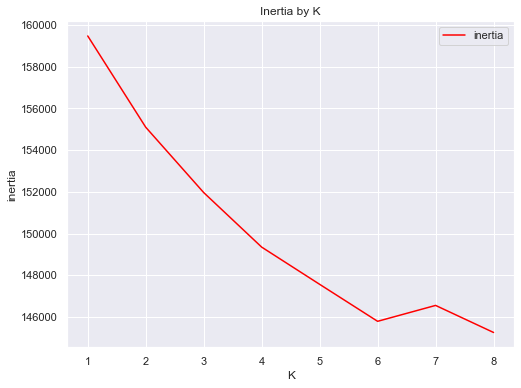

In [40]:
# we can now plot this to see where the inflection point is or where adding more clusters doesnt really add to gaining
# more information from extra clusters

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();

### Cluster Analysis

In [41]:
estimator_kmeans = KMeans(random_state=42, n_clusters=7) # making it 7 now to see what happens

estimator_kmeans.fit(text_vec) 

KMeans(n_clusters=7, random_state=42)

In [42]:
text_vec["cluster_id"] = estimator_kmeans.labels_
text_vec.head()

,000,002002,0027,004002,006,00b328bc1cf5221fc6efb560c6bb764922c31e002179799da67f1f68a503ca41,013052,013105,013124,013125,...,zta,ztna,zuckerbergstyle,zum,zumbullaw,zurich,zwatest,zyxel,zyz,cluster_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [43]:
text_clusters = text_vec.groupby('cluster_id').sum()
text_clusters.head()

,000,002002,0027,004002,006,00b328bc1cf5221fc6efb560c6bb764922c31e002179799da67f1f68a503ca41,013052,013105,013124,013125,...,zscaler,zta,ztna,zuckerbergstyle,zum,zumbullaw,zurich,zwatest,zyxel,zyz
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,6.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0


In [44]:
text_clusters_20 = text_clusters[['infosec',
 'data',
 'ransomware',
 'attack',
 'cyberattack',
 'new',
 'amp',
 'cybersecuritytips',
 'ethicalhacking',
 'cybersecuritynews',
 'iotcybersec24',
 'threat',
 'business',
 'hacker',
 'ai',
 '2021',
 'cloud',
 'python',
 'hacking']
]

text_clusters_20.head() # only focusing on top 20 post popular words ('u' not in data frame oddly)

,infosec,data,ransomware,attack,cyberattack,new,amp,cybersecuritytips,ethicalhacking,cybersecuritynews,iotcybersec24,threat,business,hacker,ai,2021,cloud,python,hacking
cluster_id,,,,,,,,,,,,,,,,,,,
0,351.0,104.0,67.0,25.0,49.0,41.0,16.0,0.0,1.0,1.0,0.0,8.0,10.0,8.0,45.0,11.0,27.0,31.0,36.0
1,64.0,254.0,267.0,119.0,135.0,259.0,292.0,8.0,0.0,2.0,0.0,133.0,212.0,38.0,59.0,142.0,114.0,6.0,38.0
2,573.0,10.0,0.0,2.0,0.0,3.0,0.0,573.0,573.0,573.0,573.0,0.0,13.0,2.0,3.0,17.0,6.0,32.0,7.0
3,0.0,21.0,147.0,3.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0
4,14.0,347.0,355.0,202.0,693.0,287.0,163.0,9.0,5.0,4.0,0.0,171.0,135.0,27.0,143.0,249.0,189.0,90.0,45.0


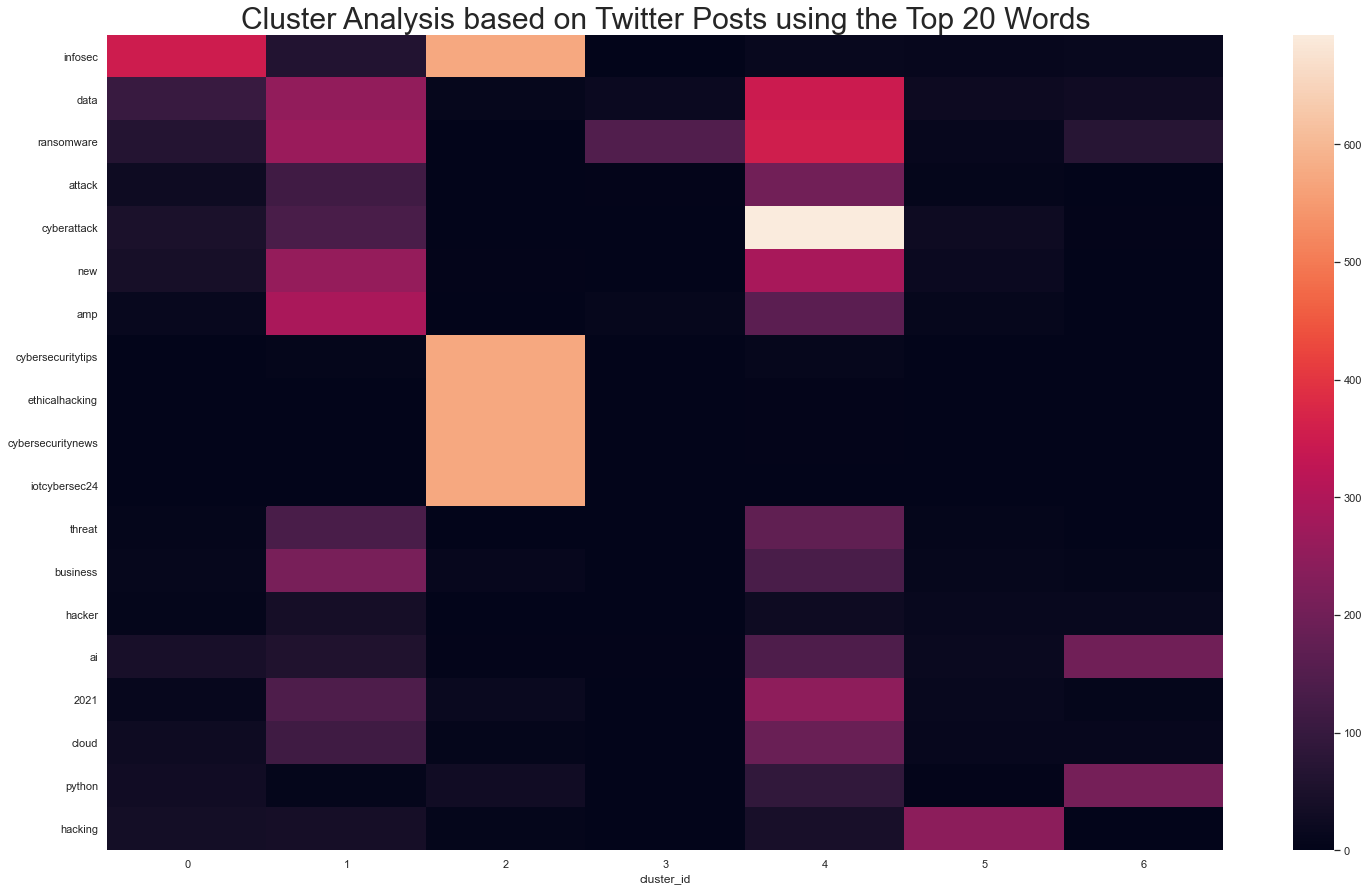

In [45]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(text_clusters_20.transpose(), annot=False)
plt.title("Cluster Analysis based on Twitter Posts using the Top 20 Words", size = 30);
# Look for rows with a lot of variation to see defining features

## Clustering | By description

### Finding K

In [46]:
def evaluate_k_kmeans_inertia(k):
    print(f"running Kmeans with k={k}")
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(desc_vec)
    return estimator_kmeans.inertia_

In [47]:
%%time 
range_k = [i for i in range(1, 9)]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k)

running Kmeans with k=1
running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=6
running Kmeans with k=7
running Kmeans with k=8
CPU times: user 6min 20s, sys: 7.91 s, total: 6min 28s
Wall time: 1min 17s


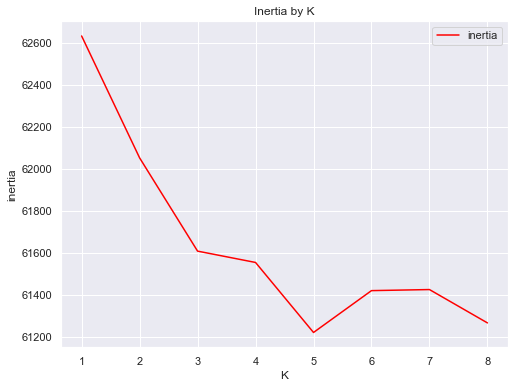

In [48]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();

### Cluster Analysis

In [49]:
estimator_kmeans = KMeans(random_state=42, n_clusters=5) # 5 for now (the elbow curve is janky)

estimator_kmeans.fit(desc_vec) 

KMeans(n_clusters=5, random_state=42)

In [50]:
desc_vec["cluster_id"] = estimator_kmeans.labels_
desc_vec.head()

,001,0099,01,01100101,01100111,01101000,01101111,01110010,01110100,0121,...,àrea,área,économique,énfasis,ïgh,ïñ,ñuñoando,österreich,þlåïñ,cluster_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [51]:
desc_clusters = desc_vec.groupby('cluster_id').sum()
desc_clusters.head()

,001,0099,01,01100101,01100111,01101000,01101111,01110010,01110100,0121,...,zyxel,àrea,área,économique,énfasis,ïgh,ïñ,ñuñoando,österreich,þlåïñ
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
desc_clusters_20 = desc_clusters[['business',
 'technology',
 'service',
 'solution',
 'news',
 'digital',
 'tech',
 'data',
 'cloud',
 'company',
 'help',
 'tweet',
 'information',
 'world',
 'software',
 'management',
 'global',
 'ai',
 'professional']]

desc_clusters_20

,business,technology,service,solution,news,digital,tech,data,cloud,company,help,tweet,information,world,software,management,global,ai,professional
cluster_id,,,,,,,,,,,,,,,,,,,
0,14.0,21.0,51.0,85.0,3.0,10.0,7.0,16.0,25.0,5.0,4.0,2.0,5.0,9.0,13.0,9.0,14.0,3.0,5.0
1,0.0,304.0,0.0,0.0,262.0,213.0,237.0,183.0,136.0,125.0,147.0,176.0,151.0,164.0,119.0,112.0,114.0,164.0,125.0
2,487.0,81.0,0.0,84.0,37.0,40.0,38.0,25.0,24.0,33.0,48.0,7.0,27.0,15.0,19.0,22.0,25.0,11.0,14.0
3,84.0,54.0,366.0,18.0,14.0,20.0,9.0,17.0,36.0,37.0,19.0,3.0,22.0,9.0,16.0,24.0,19.0,5.0,26.0
4,1.0,45.0,42.0,288.0,3.0,16.0,13.0,27.0,26.0,43.0,16.0,2.0,11.0,13.0,29.0,20.0,15.0,3.0,13.0


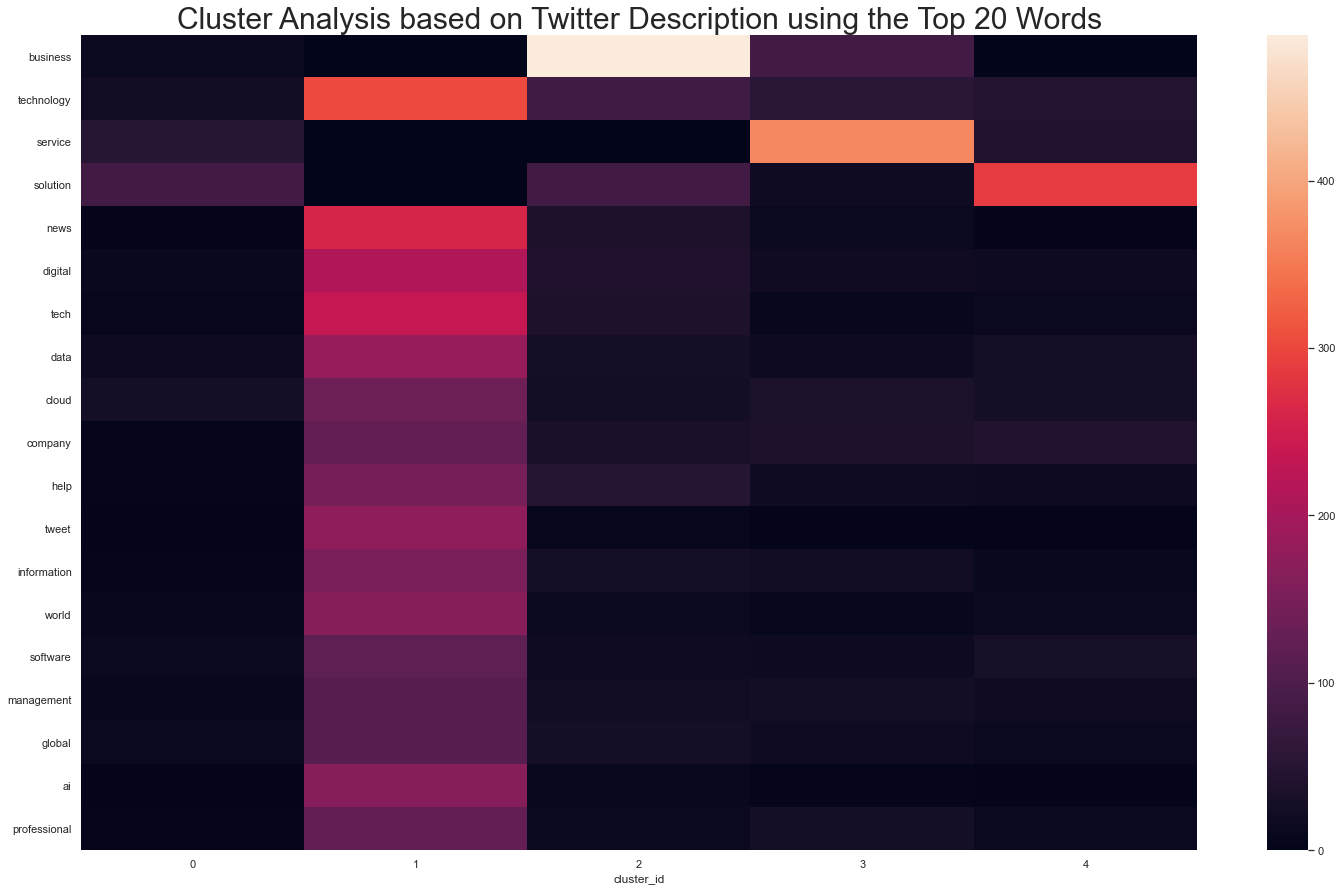

In [53]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(desc_clusters_20.transpose(), annot=False)
plt.title("Cluster Analysis based on Twitter Description using the Top 20 Words", size = 30);
# Look for rows with a lot of variation to see defining features

# Analysis of other columns

In [38]:
df2 = data[["created_at", "is_quote", "is_retweet", "retweet_count", "location", "protected", "followers_count", "friends_count", "listed_count", "account_created_at", "verified"]]
df2.head()


,created_at,is_quote,is_retweet,retweet_count,location,protected,followers_count,friends_count,listed_count,account_created_at,verified
0,2021-06-14 17:20:28,False,False,0,"Atlanta, GA",False,8524,157,134,2010-01-27 22:48:24,False
1,2021-06-12 08:47:43,False,False,4,"Atlanta, GA",False,8524,157,134,2010-01-27 22:48:24,False
2,2021-06-12 16:16:03,False,False,3,"Atlanta, GA",False,8524,157,134,2010-01-27 22:48:24,False
3,2021-06-13 10:24:28,False,False,2,"Atlanta, GA",False,8524,157,134,2010-01-27 22:48:24,False
4,2021-06-13 12:28:37,False,False,2,"Atlanta, GA",False,8524,157,134,2010-01-27 22:48:24,False


In [39]:
#saving only the time
from datetime import datetime, date
df2[["created_at"]] = df2[["created_at"]].apply(pd.to_datetime)

In [40]:
df2.dtypes

created_at            datetime64[ns]
is_quote              bool          
is_retweet            bool          
retweet_count         int64         
location              object        
protected             bool          
followers_count       int64         
friends_count         int64         
listed_count          int64         
account_created_at    object        
verified              bool          
dtype: object

In [41]:
df2['day_post_created'] = pd.DatetimeIndex(df2["created_at"]).day

In [42]:
df2.head()

,created_at,is_quote,is_retweet,retweet_count,location,protected,followers_count,friends_count,listed_count,account_created_at,verified,day_post_created
0,2021-06-14 17:20:28,False,False,0,"Atlanta, GA",False,8524,157,134,2010-01-27 22:48:24,False,14
1,2021-06-12 08:47:43,False,False,4,"Atlanta, GA",False,8524,157,134,2010-01-27 22:48:24,False,12
2,2021-06-12 16:16:03,False,False,3,"Atlanta, GA",False,8524,157,134,2010-01-27 22:48:24,False,12
3,2021-06-13 10:24:28,False,False,2,"Atlanta, GA",False,8524,157,134,2010-01-27 22:48:24,False,13
4,2021-06-13 12:28:37,False,False,2,"Atlanta, GA",False,8524,157,134,2010-01-27 22:48:24,False,13


In [43]:
#variance of retweet count is high so good to keep
print(df2.var()["retweet_count"])

58.020985107379246


In [45]:
df2.nunique() # is_retweet and is_protected has no variance (only 1 unique value). I think these variables could be important, but maybe not for this set - Elyse

created_at            16178
is_quote              2    
is_retweet            1    
retweet_count         93   
location              3096 
protected             1    
followers_count       3389 
friends_count         2803 
listed_count          924  
account_created_at    7635 
verified              2    
day_post_created      4    
dtype: int64

In [46]:
#getting only year of when the account was created
df2['year_account_created'] = pd.DatetimeIndex(df2["account_created_at"]).year

In [47]:
df2.head()

,created_at,is_quote,is_retweet,retweet_count,location,protected,followers_count,friends_count,listed_count,account_created_at,verified,day_post_created,year_account_created
0,2021-06-14 17:20:28,False,False,0,"Atlanta, GA",False,8524,157,134,2010-01-27 22:48:24,False,14,2010
1,2021-06-12 08:47:43,False,False,4,"Atlanta, GA",False,8524,157,134,2010-01-27 22:48:24,False,12,2010
2,2021-06-12 16:16:03,False,False,3,"Atlanta, GA",False,8524,157,134,2010-01-27 22:48:24,False,12,2010
3,2021-06-13 10:24:28,False,False,2,"Atlanta, GA",False,8524,157,134,2010-01-27 22:48:24,False,13,2010
4,2021-06-13 12:28:37,False,False,2,"Atlanta, GA",False,8524,157,134,2010-01-27 22:48:24,False,13,2010


In [48]:
#unique values of year
df2.year_account_created.unique()

array([2010, 2021, 2015, 2017, 2018, 2009, 2014, 2011, 2019, 2020, 2012,
       2008, 2013, 2016, 2007, 2006])

In [49]:
df2 = df2.drop(["created_at", "account_created_at"], axis=1)
df2.head()

,is_quote,is_retweet,retweet_count,location,protected,followers_count,friends_count,listed_count,verified,day_post_created,year_account_created
0,False,False,0,"Atlanta, GA",False,8524,157,134,False,14,2010
1,False,False,4,"Atlanta, GA",False,8524,157,134,False,12,2010
2,False,False,3,"Atlanta, GA",False,8524,157,134,False,12,2010
3,False,False,2,"Atlanta, GA",False,8524,157,134,False,13,2010
4,False,False,2,"Atlanta, GA",False,8524,157,134,False,13,2010


In [54]:
numerical_data = df2.select_dtypes(np.number)
categorical_data = df2.select_dtypes([object, "category"])

In [121]:
numerical_data.head() # I don't know if we want to keep year numeric or not. It might not matter but just a thought (Elyse)

,retweet_count,followers_count,friends_count,listed_count,day_post_created,year_account_created
0,0,8524,157,134,14,2010
1,4,8524,157,134,12,2010
2,3,8524,157,134,12,2010
3,2,8524,157,134,13,2010
4,2,8524,157,134,13,2010


In [122]:
categorical_data.head()

,location
0,"Atlanta, GA"
1,"Atlanta, GA"
2,"Atlanta, GA"
3,"Atlanta, GA"
4,"Atlanta, GA"


In [50]:
df.dtypes # I don't know if you meant to exclude the boolean values, but I'm going to add them as categorical for now (Elyse)

text               object
is_quote           bool  
is_retweet         bool  
retweet_count      int64 
hashtags           object
followers_count    int64 
dtype: object

In [52]:
bool_data = df2.select_dtypes(np.bool)
bool_data.head()

,is_quote,is_retweet,protected,verified
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [56]:
categorical_data = pd.concat([categorical_data, bool_data], axis=1)
categorical_data.head()

,location,is_quote,is_retweet,protected,verified
0,"Atlanta, GA",False,False,False,False
1,"Atlanta, GA",False,False,False,False
2,"Atlanta, GA",False,False,False,False
3,"Atlanta, GA",False,False,False,False
4,"Atlanta, GA",False,False,False,False


# normalize numerical data (fix scales)

In [57]:
from sklearn.preprocessing import MinMaxScaler

numerical_data_normalized = MinMaxScaler().fit_transform(numerical_data) # this line scales our data

numerical_data_normalized = pd.DataFrame(              #this pops it back in data frame format 
    numerical_data_normalized,
    columns=numerical_data.columns) 

numerical_data_normalized.head()

#numerical_data_normalized = numerical_data.astype(float)
#float(numerical_data)
#numerical_data_normalized
#numerical_data_normalized.dtypes

,retweet_count,followers_count,friends_count,listed_count,day_post_created,year_account_created
0,0.000000,0.000846,0.000389,0.001236,1.000000,0.266667
1,0.016064,0.000846,0.000389,0.001236,0.333333,0.266667
2,0.012048,0.000846,0.000389,0.001236,0.333333,0.266667
3,0.008032,0.000846,0.000389,0.001236,0.666667,0.266667
4,0.008032,0.000846,0.000389,0.001236,0.666667,0.266667


# One Hot encode our categorical data 

In [58]:
categorical_data_codified = pd.get_dummies(
                                    categorical_data, 
                                    drop_first=True,
                                    dtype="int64"
).reset_index() #have to reset the index to be able to concat

In [59]:
categorical_data_codified.head() # I think the bool values might already be encoded (T = 1, F = 0) - Elyse

,index,is_quote,is_retweet,protected,verified,location_ India Odisha,"location_ 49 Mostafa Kamel st., Semouha",location_ <U+0001F30F>Traveler,"location_ <U+25C9> i AB, Canada i",location_ Banished to COVID19 Shelter,...,"location_ÜT: 33.320427, 44.354150","location_ÜT: 33.790969,-84.391181","location_ÜT: 39.721724,-104.984062","location_ÜT: 40.462347,-3.774415","location_ÜT: 40.551249,-74.335619","location_ÜT: 43.658655,-79.377943","location_ÜT: 44.970942,-93.344616","location_ÜT: 46.661651,-67.996157","location_ÜT: 51.302106,7.067303","location_ÜT: 75.570853,-97.059868"
0,0,False,False,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,False,False,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,False,False,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,False,False,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,False,False,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
categorical_data_codified = categorical_data_codified.drop('index', axis = 1) # dropping the index col - Elyse

In [67]:
categorical_data_codified.dtypes

is_quote                             bool 
is_retweet                           bool 
protected                            bool 
verified                             bool 
location_  India Odisha              int64
                                     ...  
location_ÜT: 43.658655,-79.377943    int64
location_ÜT: 44.970942,-93.344616    int64
location_ÜT: 46.661651,-67.996157    int64
location_ÜT: 51.302106,7.067303      int64
location_ÜT: 75.570853,-97.059868    int64
Length: 3099, dtype: object

In [68]:
numerical_data_normalized.shape

(17656, 6)

In [69]:
numerical_data_normalized.dtypes

retweet_count           float64
followers_count         float64
friends_count           float64
listed_count            float64
day_post_created        float64
year_account_created    float64
dtype: object

In [70]:
df2_processed = pd.concat([
                            numerical_data_normalized,
                            categorical_data_codified
                        ], axis=1
).reset_index()

In [71]:
df2_processed.head()

,index,retweet_count,followers_count,friends_count,listed_count,day_post_created,year_account_created,is_quote,is_retweet,protected,...,"location_ÜT: 33.320427, 44.354150","location_ÜT: 33.790969,-84.391181","location_ÜT: 39.721724,-104.984062","location_ÜT: 40.462347,-3.774415","location_ÜT: 40.551249,-74.335619","location_ÜT: 43.658655,-79.377943","location_ÜT: 44.970942,-93.344616","location_ÜT: 46.661651,-67.996157","location_ÜT: 51.302106,7.067303","location_ÜT: 75.570853,-97.059868"
0,0,0.000000,0.000846,0.000389,0.001236,1.000000,0.266667,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,1,0.016064,0.000846,0.000389,0.001236,0.333333,0.266667,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,2,0.012048,0.000846,0.000389,0.001236,0.333333,0.266667,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,3,0.008032,0.000846,0.000389,0.001236,0.666667,0.266667,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,4,0.008032,0.000846,0.000389,0.001236,0.666667,0.266667,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df2_processed = df2_processed.drop(['index'], axis=1) # did not see you already did this lol - Elyse

In [73]:
df2_processed.head()

,retweet_count,followers_count,friends_count,listed_count,day_post_created,year_account_created,is_quote,is_retweet,protected,verified,...,"location_ÜT: 33.320427, 44.354150","location_ÜT: 33.790969,-84.391181","location_ÜT: 39.721724,-104.984062","location_ÜT: 40.462347,-3.774415","location_ÜT: 40.551249,-74.335619","location_ÜT: 43.658655,-79.377943","location_ÜT: 44.970942,-93.344616","location_ÜT: 46.661651,-67.996157","location_ÜT: 51.302106,7.067303","location_ÜT: 75.570853,-97.059868"
0,0.000000,0.000846,0.000389,0.001236,1.000000,0.266667,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,0.016064,0.000846,0.000389,0.001236,0.333333,0.266667,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,0.012048,0.000846,0.000389,0.001236,0.333333,0.266667,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,0.008032,0.000846,0.000389,0.001236,0.666667,0.266667,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,0.008032,0.000846,0.000389,0.001236,0.666667,0.266667,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


# K-means

In [74]:
from sklearn.cluster import KMeans

In [75]:
estimator_kmeans = KMeans(random_state=42, n_clusters=8) # instantiate our Kmeans model

estimator_kmeans.fit(df2_processed) # fit the model to our vehicles data

KMeans(random_state=42)

In [76]:
estimator_kmeans.predict(df2_processed)

array([3, 3, 3, ..., 5, 5, 5], dtype=int32)

In [77]:
centroids = estimator_kmeans.cluster_centers_
centroids

array([[ 1.17392648e-02,  8.47262973e-04,  1.28591061e-02, ...,
        -6.77626358e-21, -6.77626358e-21, -6.77626358e-21],
       [ 7.30673770e-03,  1.08121711e-03,  7.70790300e-03, ...,
         2.52972426e-04, -6.36968776e-19, -6.36968776e-19],
       [ 1.29478792e-02,  2.70987633e-04,  4.42146285e-03, ...,
        -4.33680869e-19, -4.33680869e-19, -4.33680869e-19],
       ...,
       [ 1.32051902e-02,  6.43114684e-04,  5.67251003e-03, ...,
        -1.42979161e-18,  1.34246208e-04,  1.34246208e-04],
       [ 1.80104170e-02,  2.12001866e-02,  1.67840899e-02, ...,
        -6.77626358e-21, -6.77626358e-21, -6.77626358e-21],
       [ 1.07573150e-02,  3.66669066e-04,  5.91719964e-03, ...,
        -6.77626358e-21, -6.77626358e-21, -6.77626358e-21]])

In [78]:
centroids.shape

(8, 3105)

In [79]:
estimator_kmeans.inertia_
#how well algorithm is fitting ur data


14338.368931254237

# describing clusters

In [80]:
estimator_kmeans.labels_.shape # these are the predicted cluster labels

(17656,)

In [81]:
df2["cluster_id"] = estimator_kmeans.labels_ 

In [82]:
df2.tail()

,is_quote,is_retweet,retweet_count,location,protected,followers_count,friends_count,listed_count,verified,day_post_created,year_account_created,cluster_id
17949,False,False,0,India,False,231,23,60,False,11,2008,7
17950,False,False,4,Czech Republic,False,123,290,5,False,11,2014,5
17951,False,False,0,"Milton Keynes, England",False,535,668,2,False,11,2017,5
17952,False,False,1,"Stockholm, Sweden, Worldwide",False,1053,290,27,False,11,2011,5
17953,False,False,1,"New York, NY",False,460,372,42,False,11,2010,5


In [83]:
# we can see how many of each cluster we had in our original data frame
df2.cluster_id.value_counts()

5    7449
2    4013
1    3953
6    714 
4    710 
3    511 
7    280 
0    26  
Name: cluster_id, dtype: int64

In [84]:
# We can create a function to try and summarize the clusters
#For the numerical values this is easy we can just ge the average value for that cluster.
#For the categorical values - this is where mode comes in really handy
def cluster_summary(cluster_id):  # define a function and call it cluster_summary, that takes the input of a cluster id/label
    cluster = df2[df2.cluster_id==cluster_id] # pull out all the rows with that ID
    cluster_summary = cluster[categorical_data.columns].mode().to_dict(orient="records")[0] # get mode for categoricals
    cluster_summary.update(cluster.mean().to_dict()) # get means for numerical (only does for numerical if we didnt specify)
    return cluster_summary # display the summary 

In [85]:
cluster_summary(5)

{'location': 'New York, USA',
 'is_quote': 0.04363001745200698,
 'is_retweet': 0.0,
 'protected': 0.0,
 'verified': 0.0,
 'retweet_count': 3.288092361390791,
 'followers_count': 6477.467176802255,
 'friends_count': 2287.6382064706672,
 'listed_count': 232.08860249697946,
 'day_post_created': 11.476439790575917,
 'year_account_created': 2014.3283662236543,
 'cluster_id': 5.0}

In [86]:
# we can make a function that puts comparisons side by side so its easier for us to see in a data frame 

def cluster_comparison(*cluster_ids):
    summaries = []
    for cluster_id in cluster_ids:
        summaries.append(cluster_summary(cluster_id))
    return pd.DataFrame(summaries).set_index("cluster_id").T

In [87]:
cluster_comparison(0,1,2,3)

cluster_id,0.0,1.0,2.0,3.0
location,"Barcelona, Spain",Global,"New York, USA","Atlanta, GA"
is_quote,0.038462,0.043005,0.031647,0.005871
is_retweet,0.0,0.0,0.0,0.0
protected,0.0,0.0,0.0,0.0
verified,0.0,0.0,0.0,0.001957
retweet_count,2.923077,1.819378,3.224022,1.313112
followers_count,8533.653846,10890.045788,2729.394219,7828.843444
friends_count,5185.884615,3108.481659,1783.109644,216.780822
listed_count,2644.807692,356.996458,103.274109,133.262231
day_post_created,12.115385,13.652416,13.611513,12.598826


In [88]:
cluster_comparison(0,1,2,3,4,5,6,7)

cluster_id,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
location,"Barcelona, Spain",Global,"New York, USA","Atlanta, GA",United States,"New York, USA",Global,India
is_quote,0.038462,0.043005,0.031647,0.005871,0.005634,0.04363,0.022409,0.014286
is_retweet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
protected,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
verified,0.0,0.0,0.0,0.001957,0.009859,0.0,1.0,0.003571
retweet_count,2.923077,1.819378,3.224022,1.313112,1.202817,3.288092,4.484594,2.678571
followers_count,8533.653846,10890.045788,2729.394219,7828.843444,8511.409859,6477.467177,213528.809524,3693.1
friends_count,5185.884615,3108.481659,1783.109644,216.780822,2767.721127,2287.638206,6768.771709,2386.317857
listed_count,2644.807692,356.996458,103.274109,133.262231,168.511268,232.088602,2119.585434,1713.053571
day_post_created,12.115385,13.652416,13.611513,12.598826,12.607042,11.47644,12.572829,12.653571


In [89]:
def kmeans_cluster(df, n_clusters=2):
    """This function assigns clusters to every row in the dataframe via kmeans"""
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

def graph_summary_clustering(results):
    """this function produces a summary of the clusters"""
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    cluster_summary = cluster_summary.drop(["Count"], axis=1).set_index("Cluster")
    return cluster_summary[sorted(cluster_summary.columns)]

In [90]:
# this means if I want to try out 4 clusters instead of 8 its really easy for me to do
#Im going to choose 4 here instead of 8 

cluster_results = kmeans_cluster(df2_processed, 8)
cluster_summary = graph_summary_clustering(cluster_results);

In [91]:
cluster_summary

,day_post_created,followers_count,friends_count,is_quote,is_retweet,listed_count,location_ India Odisha,"location_ 49 Mostafa Kamel st., Semouha",location_ <U+0001F30F>Traveler,"location_ <U+25C9> i AB, Canada i",...,"location_ÜT: 40.551249,-74.335619","location_ÜT: 43.658655,-79.377943","location_ÜT: 44.970942,-93.344616","location_ÜT: 46.661651,-67.996157","location_ÜT: 51.302106,7.067303","location_ÜT: 75.570853,-97.059868",protected,retweet_count,verified,year_account_created
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.371795,0.000847,0.012859,0.038462,0.0,0.024400,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.011739,0.000000,0.141026
1,0.884139,0.001081,0.007708,0.043005,0.0,0.003294,0.000000,0.000000,0.000000,0.000253,...,0.000253,0.000253,0.000253,0.000253,0.000000,0.000000,0.0,0.007307,0.000000,0.311207
2,0.870504,0.000271,0.004421,0.031647,0.0,0.000953,0.000000,0.000000,0.000498,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.012948,0.000000,0.801362
3,0.532942,0.000777,0.000538,0.005871,0.0,0.001229,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.005274,0.001957,0.299674
4,0.535681,0.000845,0.006863,0.005634,0.0,0.001555,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004831,0.009859,0.372676
5,0.158813,0.000643,0.005673,0.043630,0.0,0.002141,0.000134,0.000134,0.000134,0.000000,...,0.000000,0.000000,0.000134,0.000000,0.000134,0.000134,0.0,0.013205,0.000000,0.555224
6,0.524276,0.021200,0.016784,0.022409,0.0,0.019555,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.018010,1.000000,0.271895
7,0.551190,0.000367,0.005917,0.014286,0.0,0.015804,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.010757,0.003571,0.553095


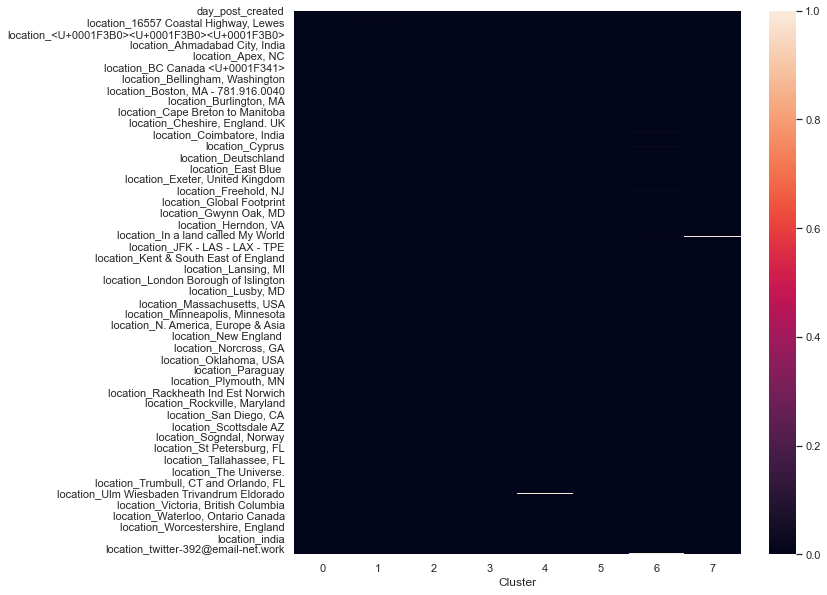

In [92]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cluster_summary.transpose(), annot=False); # making annot False yo get rid of the white - Elyse

# a lot of columns were removed (likelt because they couldn't get 3000+ columns on there), so I am thinking we 
# should look into engineering some columns so they dont have soo many values. Like for the location column
# we could try to group values by country instead of having location_Oklahoma, location_Boston, etc. I also notice 
# that one location says twitter-392@email-net.work which isn't a location lol. I don't know if there is something 
# to help us verify locations but it would be helpful

# choosing k number of clusters

In [165]:
# function that takes in a range of values for K 
# runs the model and then outputs the inertia value so we can see how well the clusters are grouped 


def evaluate_k_kmeans_inertia(k):
    print(f"running Kmeans with k={k}")
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(df2_processed)
    return estimator_kmeans.inertia_

In [166]:
%%time 
range_k = [2, 3, 4, 5, 8, 10, 15, 20, 25, 30]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k)

running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=8
running Kmeans with k=10
running Kmeans with k=15
running Kmeans with k=20
running Kmeans with k=25
running Kmeans with k=30
CPU times: user 22min 57s, sys: 27.1 s, total: 23min 24s
Wall time: 3min 52s


In [167]:
results_k # so we get a 2d array back with the k + the intertia value

{2: 114666296087.54323,
 3: 50962810761.20534,
 4: 28666594405.39961,
 5: 18346640312.30887,
 8: 7166717300.84614,
 10: 4586750276.671214,
 15: 2038673378.8873062,
 20: 1146758773.5006528,
 25: 733992839.2998452,
 30: 509699237.0349533}

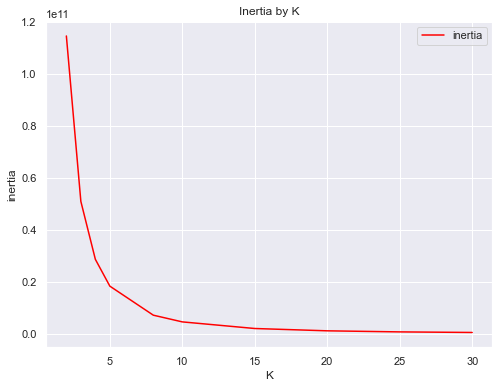

In [168]:
# we can now plot this to see where the inflection point is or where adding more clusters doesnt really add to gaining
# more information from extra clusters

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend()


# More Accurate way of using Elbow method with Within Cluster Sum of Squares

In [192]:
from scipy.spatial.distance import cdist

In [193]:
print(cdist.__doc__)


    Compute distance between each pair of the two collections of inputs.

    See Notes for common calling conventions.

    Parameters
    ----------
    XA : ndarray
        An :math:`m_A` by :math:`n` array of :math:`m_A`
        original observations in an :math:`n`-dimensional space.
        Inputs are converted to float type.
    XB : ndarray
        An :math:`m_B` by :math:`n` array of :math:`m_B`
        original observations in an :math:`n`-dimensional space.
        Inputs are converted to float type.
    metric : str or callable, optional
        The distance metric to use.  If a string, the distance function can be
        'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
        'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon',
        'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
        'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean',
        'wminkowski', 'yule'.
    *args : tuple. 

In [194]:
total_variance = cdist(
    XA=df2_processed, 
    XB=np.array([df2_processed.mean()])
)

In [195]:
total_variance_sum = total_variance.sum()

In [196]:
total_variance_sum

nan

In [198]:
def cluster_variance(cluster_id, cluster_centroid, cluster_labels):
    cluster_elements = df2_processed[cluster_labels==cluster_id]
    return cdist(XA=cluster_elements, XB=np.array([cluster_centroid])).sum()

def variance_measure(estimator_kmeans, total_variance):
    clusters_labels = estimator_kmeans.labels_
    wss = 0
    for i, cluster_id in enumerate(np.unique(clusters_labels)):
        cluster_centroid = estimator_kmeans.cluster_centers_[i]
        wss += cluster_variance(cluster_id, cluster_centroid, clusters_labels)
    return (total_variance-wss) / total_variance

In [199]:
def inertia_measure(estimator_kmeans):
    return estimator_kmeans.inertia_

In [202]:
def evaluate_k_kmeans(k, scoring, **kwargs):
    scoring_measure = None
    if scoring=="inertia":
        scoring_measure = inertia_measure
    elif scoring=="variance":
        scoring_measure = variance_measure
        
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(df2_processed)
    return scoring_measure(estimator_kmeans, **kwargs)

In [203]:
results_k = {}
range_k = [5, 10, 20, 30, 50, 100, 200]
for k in range_k:
    results_k[k] = (
        evaluate_k_kmeans(k, "inertia"), 
        evaluate_k_kmeans(k, "variance", total_variance=total_variance_sum), 
    )

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
results_k

In [ ]:
ax1 = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1][0] for c in results_k.items()], label="inertia", color="red"
)
with sns.axes_style("dark"):
    ax2 = ax1.twinx()
    
ax2 = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1][1] for c in results_k.items()], label="percentage variance explained", color="blue",
    ax=ax2)
